## Importing the data

In [221]:
# I am using pyforest library , so there is no need to import  libraries like numpy,pandas,matplotlib,seaborn etc.
data =pd.read_csv('ab_data.csv')
data2=pd.read_csv('countries.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploring the dataset

In [2]:
data.head()      #converted is output variable , 0 means no action, 1 means action on that page

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [7]:
data.shape

(294478, 5)

In [19]:
data.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [11]:
data.user_id.value_counts()

746755    2
722274    2
892271    2
736112    2
728134    2
         ..
700160    1
698113    1
704258    1
702211    1
630732    1
Name: user_id, Length: 290584, dtype: int64

In [17]:
data.user_id.unique().shape

(290584,)

## Visualising 

In [5]:
a=data.groupby('group').count()


In [32]:
a

,user_id,timestamp,landing_page,converted
group,,,,
control,147202,147202,147202,147202
treatment,147276,147276,147276,147276


In [34]:
data.value_counts('converted')

converted
0    259241
1     35237
dtype: int64

<AxesSubplot:xlabel='converted'>

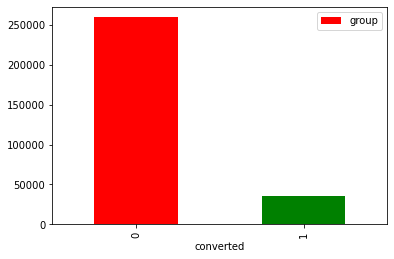

In [39]:
data.groupby('converted').count()['group'].plot(kind='bar',color=['red','green'],legend=True)

<IPython.core.display.Javascript object>

D:\myanaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='converted', ylabel='count'>

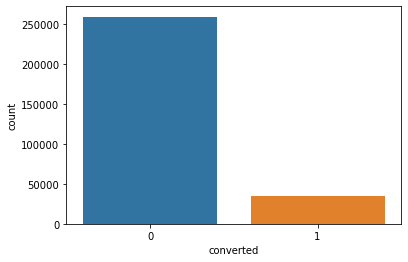

In [48]:
sns.countplot('converted',data=data)

In [50]:
data['converted'].value_counts()/len(data)

0    0.880341
1    0.119659
Name: converted, dtype: float64

In [51]:
# The overall click through rate is approx. 11 % , and approx. 88% is not clicked.

In [3]:
g1=data.loc[data.group=='control']

In [4]:
g2=data.loc[data.group=='treatment']

In [58]:
g2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [59]:
g1.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


<IPython.core.display.Javascript object>

D:\myanaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='converted', ylabel='count'>

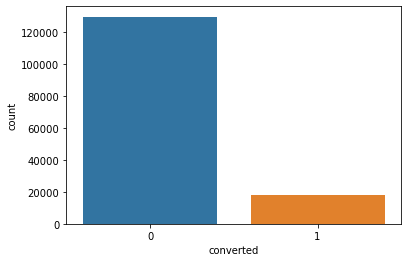

In [65]:
sns.countplot('converted',data=g1)   # control gp.

In [63]:
g1['converted'].value_counts()/len(g1)   # control group

0    0.879601
1    0.120399
Name: converted, dtype: float64

In [ ]:
#The control group  click through rate is approx. 12 % , and approx. 87% is not clicked.

<IPython.core.display.Javascript object>

D:\myanaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='converted', ylabel='count'>

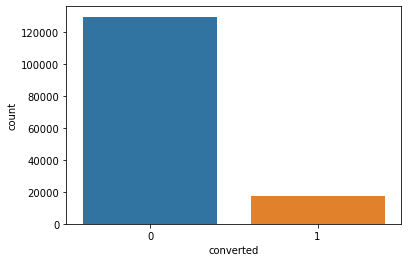

In [5]:
sns.countplot('converted',data=g2) 

In [6]:
g2['converted'].value_counts()/len(g2)

0    0.88108
1    0.11892
Name: converted, dtype: float64

In [ ]:
#The treatment  group  click through rate is approx. 11 % , and approx. 88% is not clicked.

In [ ]:
# There is a difference of 1% between control and treatment group CTR . So control group has higher CTR. 

In [ ]:
# Which page is doing well old or new?

In [7]:
old=data.loc[data.landing_page=='old_page']

In [13]:
new=data.loc[data.landing_page=='new_page']

In [8]:
old.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


<IPython.core.display.Javascript object>

D:\myanaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='converted', ylabel='count'>

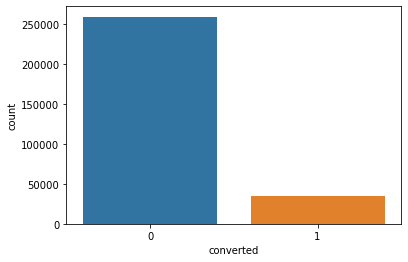

In [10]:
sns.countplot(data.converted,data=old)

In [11]:
old['converted'].value_counts()/len(old) 

0    0.879522
1    0.120478
Name: converted, dtype: float64

In [ ]:
# CTR for old_page 12% while not clicked is 87%

<IPython.core.display.Javascript object>

D:\myanaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='converted', ylabel='count'>

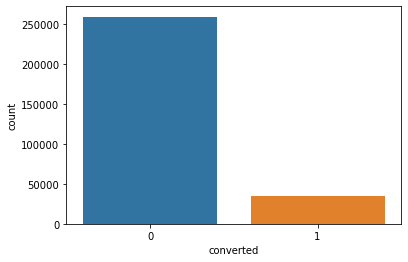

In [14]:
sns.countplot(data.converted,data=new)

In [15]:
new['converted'].value_counts()/len(new)

0    0.881159
1    0.118841
Name: converted, dtype: float64

In [16]:
n1=g1.loc[data.landing_page=='new_page']
n2=g1.loc[data.landing_page=='old_page']

In [17]:
print(n1.head())
print(n2.head())

     user_id                   timestamp    group landing_page  converted
22    767017  2017-01-12 22:58:14.991443  control     new_page          0
240   733976  2017-01-11 15:11:16.407599  control     new_page          0
490   808613  2017-01-10 21:44:01.292755  control     new_page          0
846   637639  2017-01-11 23:09:52.682329  control     new_page          1
850   793580  2017-01-08 03:25:33.723712  control     new_page          1
   user_id                   timestamp    group landing_page  converted
0   851104  2017-01-21 22:11:48.556739  control     old_page          0
1   804228  2017-01-12 08:01:45.159739  control     old_page          0
4   864975  2017-01-21 01:52:26.210827  control     old_page          1
5   936923  2017-01-10 15:20:49.083499  control     old_page          0
7   719014  2017-01-17 01:48:29.539573  control     old_page          0


In [23]:
control_new_page =n1['converted'].value_counts()/len(n1)

In [24]:
control_old_page=n2['converted'].value_counts()/len(n2)

In [25]:
n3=g2.loc[data.landing_page=='new_page']
n4=g2.loc[data.landing_page=='old_page']

In [26]:
treatment_new_page=n3['converted'].value_counts()/len(n3)
treatment_old_page=n4['converted'].value_counts()/len(n4)

In [27]:
print(control_new_page)
print(treatment_new_page)
print(control_old_page)
print(treatment_old_page)

0    0.878631
1    0.121369
Name: converted, dtype: float64
0    0.881193
1    0.118807
Name: converted, dtype: float64
0    0.879614
1    0.120386
Name: converted, dtype: float64
0    0.872774
1    0.127226
Name: converted, dtype: float64


In [2]:
n_data= pd.merge(data,data2,on='user_id')

<IPython.core.display.Javascript object>

In [3]:
n_data

,user_id,timestamp,group,landing_page,converted,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,US
...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,US
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,US
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,US
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,US


In [7]:
a=n_data.groupby('country').count()['user_id']

In [17]:
a

country
CA     14695
UK     73419
US    206364
Name: user_id, dtype: int64

<AxesSubplot:title={'center':'Number of users in each country'}, xlabel='country', ylabel='number of users'>

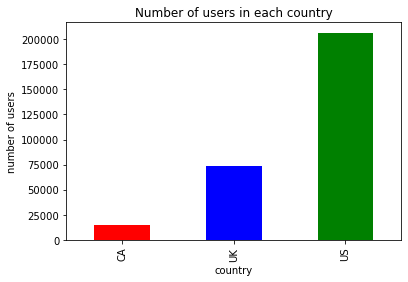

In [38]:
a.plot.bar(title='Number of users in each country',color=['red','blue','green'],ylabel="number of users")


In [45]:
s=n_data.groupby(['country','converted','landing_page']).count()['user_id']

In [46]:
s

country  converted  landing_page
CA       0          new_page         6572
                    old_page         6420
         1          new_page          833
                    old_page          870
UK       0          new_page        32148
                    old_page        32418
         1          new_page         4439
                    old_page         4414
US       0          new_page        91021
                    old_page        90662
         1          new_page        12226
                    old_page        12455
Name: user_id, dtype: int64

In [51]:
h=n_data.groupby(['country','converted']).count()['user_id']

<AxesSubplot:ylabel='user_id'>

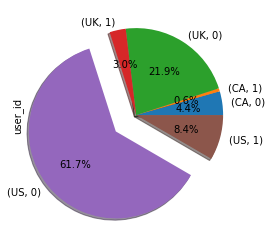

In [66]:
h.plot(kind='pie',shadow=True,autopct='%1.1f%%',explode=[0,0,0,0,0.3,0])


In [ ]:
# Highest number of people of US had not converted their landing page(61.7%) while 
#in canada 0.6% of people converted their landing page.

In [120]:
g1=n_data.loc[(n_data.group=='control') & (n_data['landing_page']=='new_page'),['converted','country']]


In [170]:
g2=g1.groupby('country').count()

In [171]:
g2

,converted
country,
CA,104
UK,481
US,1343


<AxesSubplot:xlabel='country'>

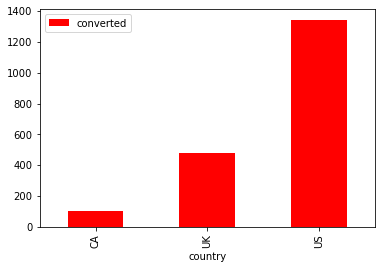

In [173]:
g2.plot(kind='bar',color=['red','green','blue'])

In [176]:
# From control group there are 104 people from Canada , 481 people from UK 
#and 1343 people from US who landed to new landing page.

In [222]:
data[['date','time']]=data['timestamp'].str.split(" ",expand=True)


In [223]:
data[['time','a']]=data['time'].str.split(".",expand=True)

In [224]:
data.drop('a',axis=1,inplace=True)

In [225]:
data[['hour','min','sec']]=data['time'].str.split(":",expand=True)

In [227]:
data.drop('timestamp',axis=True,inplace=True)

In [228]:
data.head()

,user_id,group,landing_page,converted,date,time,hour,min,sec
0,851104,control,old_page,0,2017-01-21,22:11:48,22,11,48
1,804228,control,old_page,0,2017-01-12,08:01:45,08,01,45
2,661590,treatment,new_page,0,2017-01-11,16:55:06,16,55,06
3,853541,treatment,new_page,0,2017-01-08,18:28:03,18,28,03
4,864975,control,old_page,1,2017-01-21,01:52:26,01,52,26


In [179]:
data.time.describe()


count              294478
unique             294478
top       21:52:33.856862
freq                    1
Name: time, dtype: object

In [229]:
data['date']=pd.to_datetime(data['date'])

<IPython.core.display.Javascript object>

In [230]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       294478 non-null  int64         
 1   group         294478 non-null  object        
 2   landing_page  294478 non-null  object        
 3   converted     294478 non-null  int64         
 4   date          294478 non-null  datetime64[ns]
 5   time          294478 non-null  object        
 6   hour          294478 non-null  object        
 7   min           294478 non-null  object        
 8   sec           294478 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 20.2+ MB


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'number of clicks')

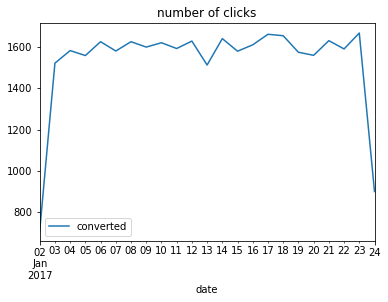

In [231]:
data.groupby('date').agg({'converted':'sum'}).plot()
plt.title('number of clicks')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

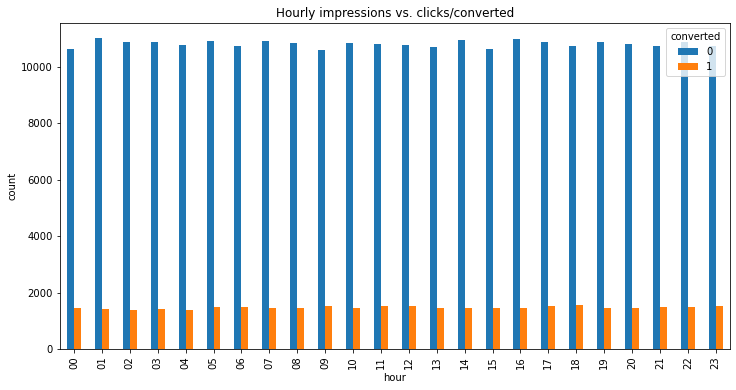

In [237]:
data.groupby(['hour', 'converted']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks/converted');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

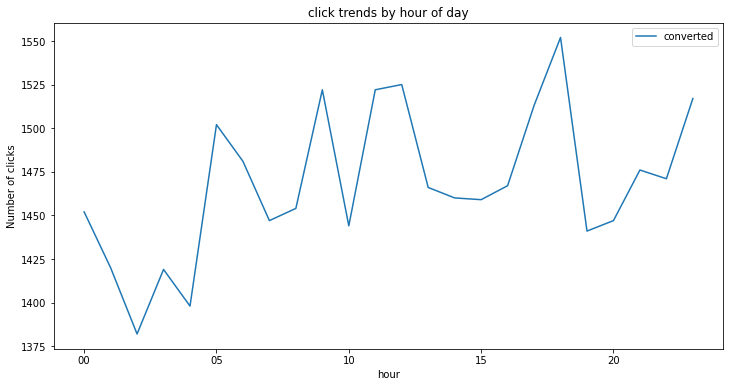

In [236]:

data.groupby('hour').agg({'converted':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

In [ ]:
# most of the clicks in a day are between 15 to 20 th hour of the day.

In [240]:
print('Thankyou')

Thankyou
